In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Load Dataset

In [ ]:
#p-drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#autthenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file = drive.CreateFile({'id':'1uJXHe24-FmqmrI2irs85V2dXGmFLE2w6'})

In [ ]:
file.GetContentFile('winered.csv')
df_wr = pd.read_csv('winered.csv', delimiter=',')

In [ ]:
df_wr.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
print('This Data Set Contain')
print('Row:', df_wr.shape[0])
print('column:', df_wr.shape[1])

This Data Set Contain
Row: 1599
column: 12


In [ ]:
df_wr.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
df_wr.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

## Data Visualization

#### Distplot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

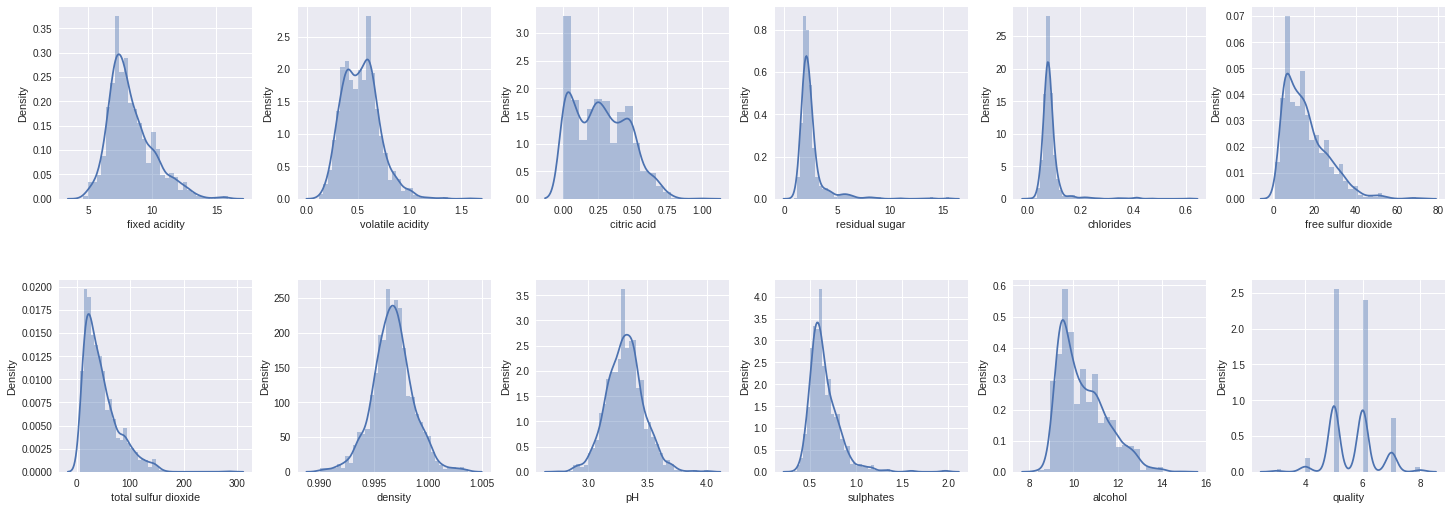

In [ ]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 7))
index = 0
axs = axs.flatten()
for k,v in df_wr.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#preparing bar-label encoder
mb = df_wr.groupby('quality').count().reset_index()
mb['count'] = mb.iloc[:,2]
mb = mb.iloc[:,[0, -1]]

Text(0.5, 0, 'Quality')

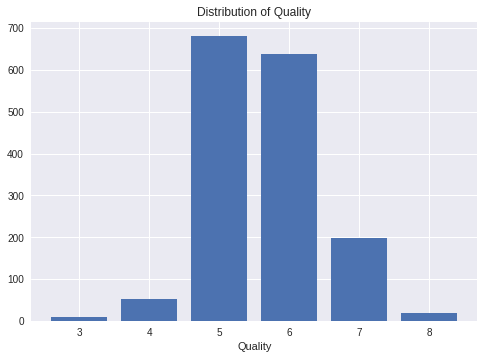

In [ ]:
plt.bar(mb['quality'], mb['count'])
plt.title("Distribution of Quality")
plt.xlabel("Quality")

kualitas red wine terlihat mampunyai distribusi normal, dengan kelas 5 dan 6 memayoritasi dari skala 3-8

#### Boxplot - Distribution and Comparison

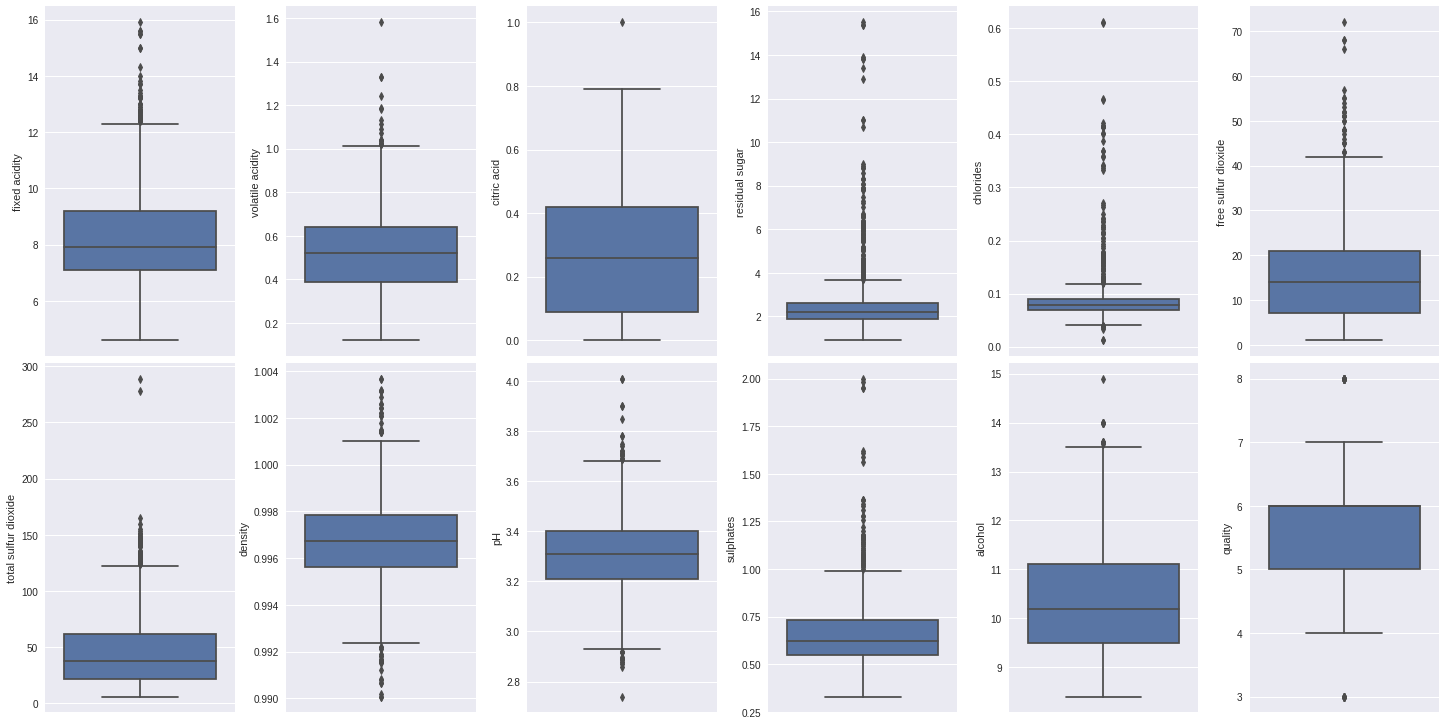

In [ ]:
figure, axis = plt.subplots(2,6, figsize=(20,10))
index = 0
axis = axis.flatten()
for k, v in df_wr.items():
  sns.boxplot(y=k, data=df_wr, ax=axis[index])
  index +=1
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad = 0.5)
plt.show()

dapat dilihat, distribusi beberapa variabel mengandung outlier yang cukup banyak sehingga perlu proses preprocessing yang cukup.

## Heatmap - Correlation

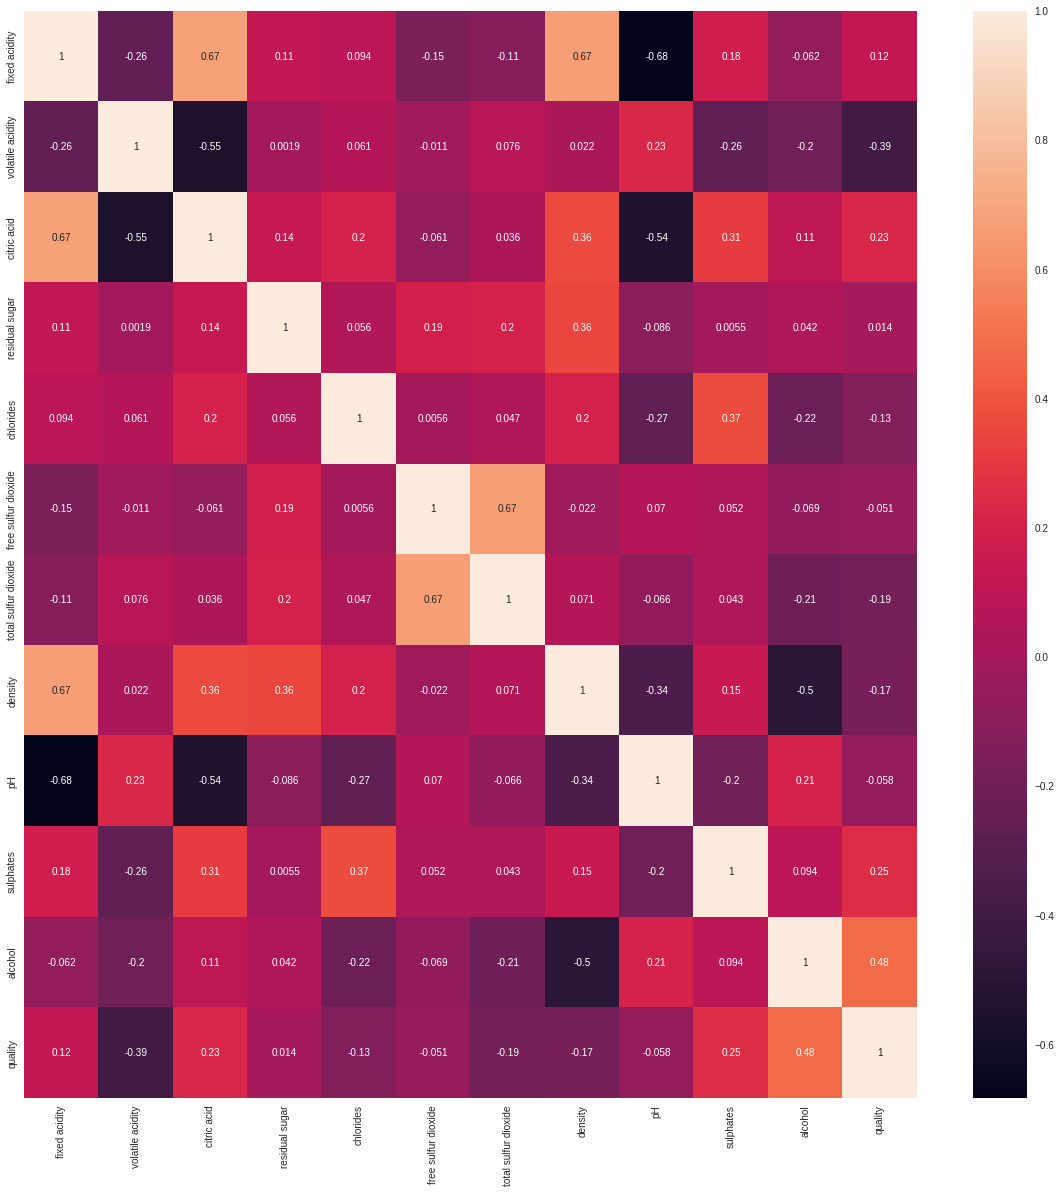

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_wr.corr(), annot=True)
plt.show()

## Pairplot - Relation, comparison, distribution

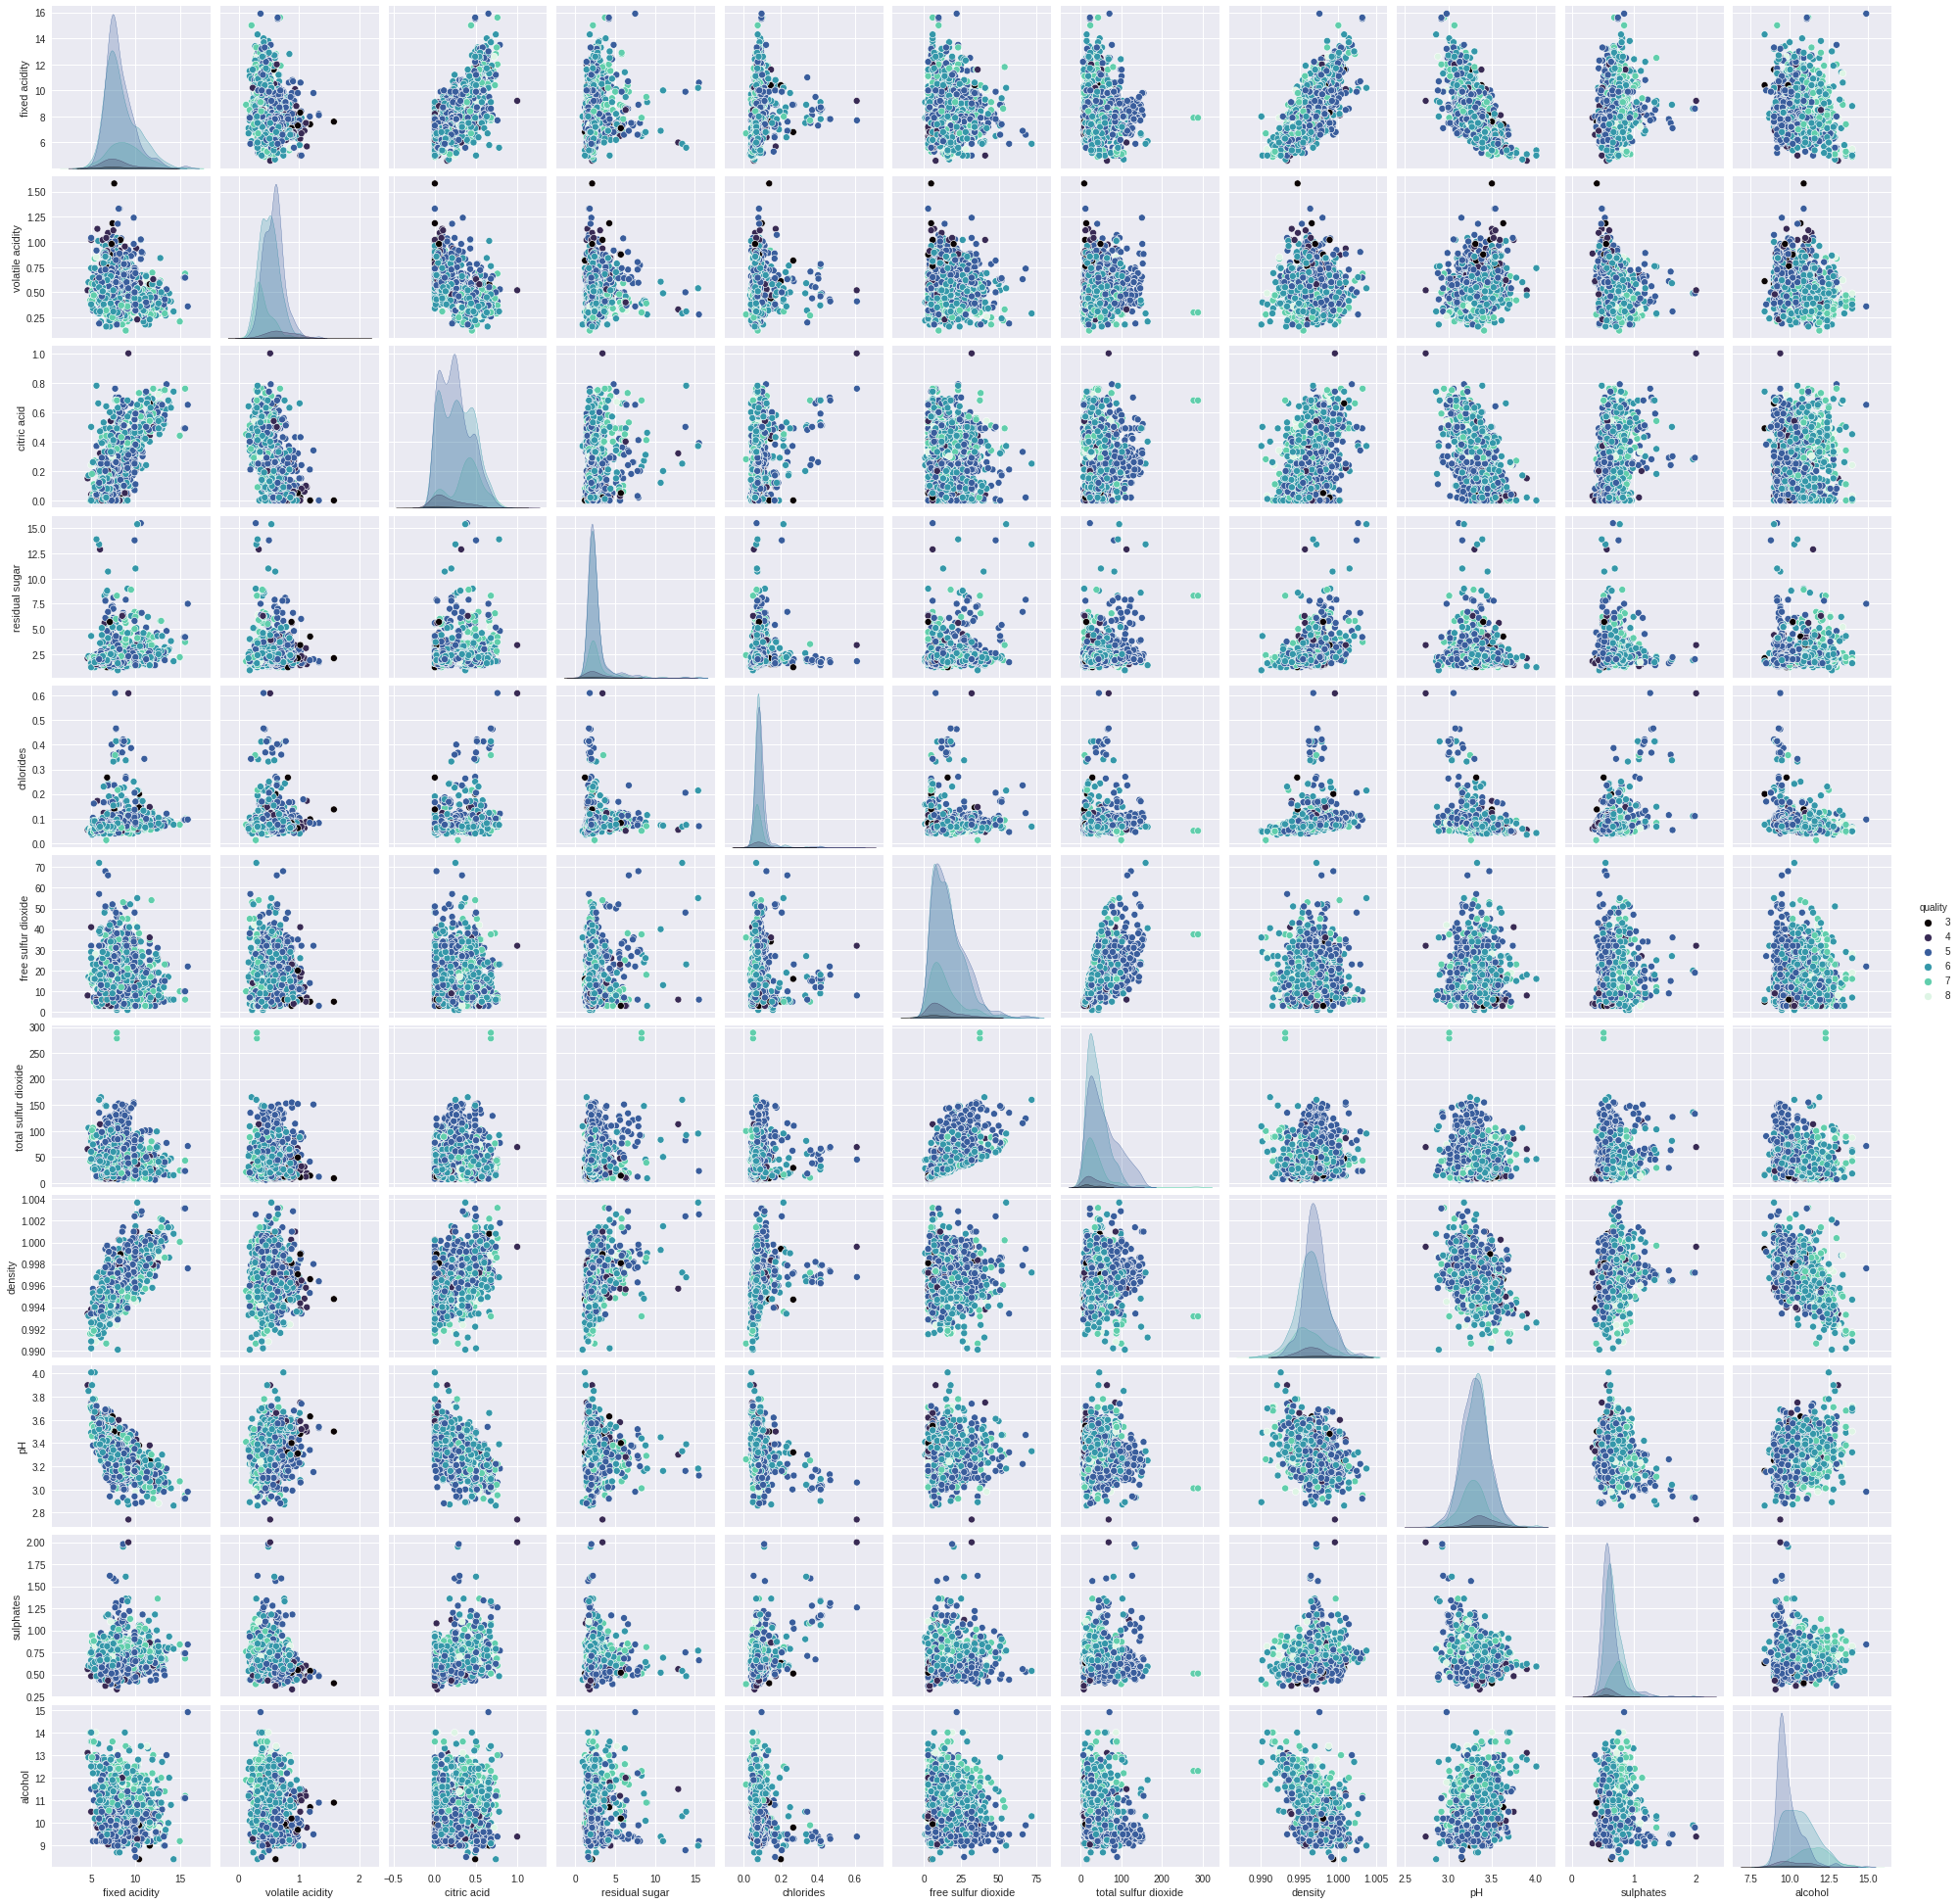

In [ ]:
sns.pairplot(df_wr, hue='quality', palette='mako')
plt.show()

# Data Preprocessing

In [ ]:
# Drop which is relation under 10%
cols = ['residual sugar', 'free sulfur dioxide', 'pH']
df_wr = df_wr.drop(cols, axis=1)

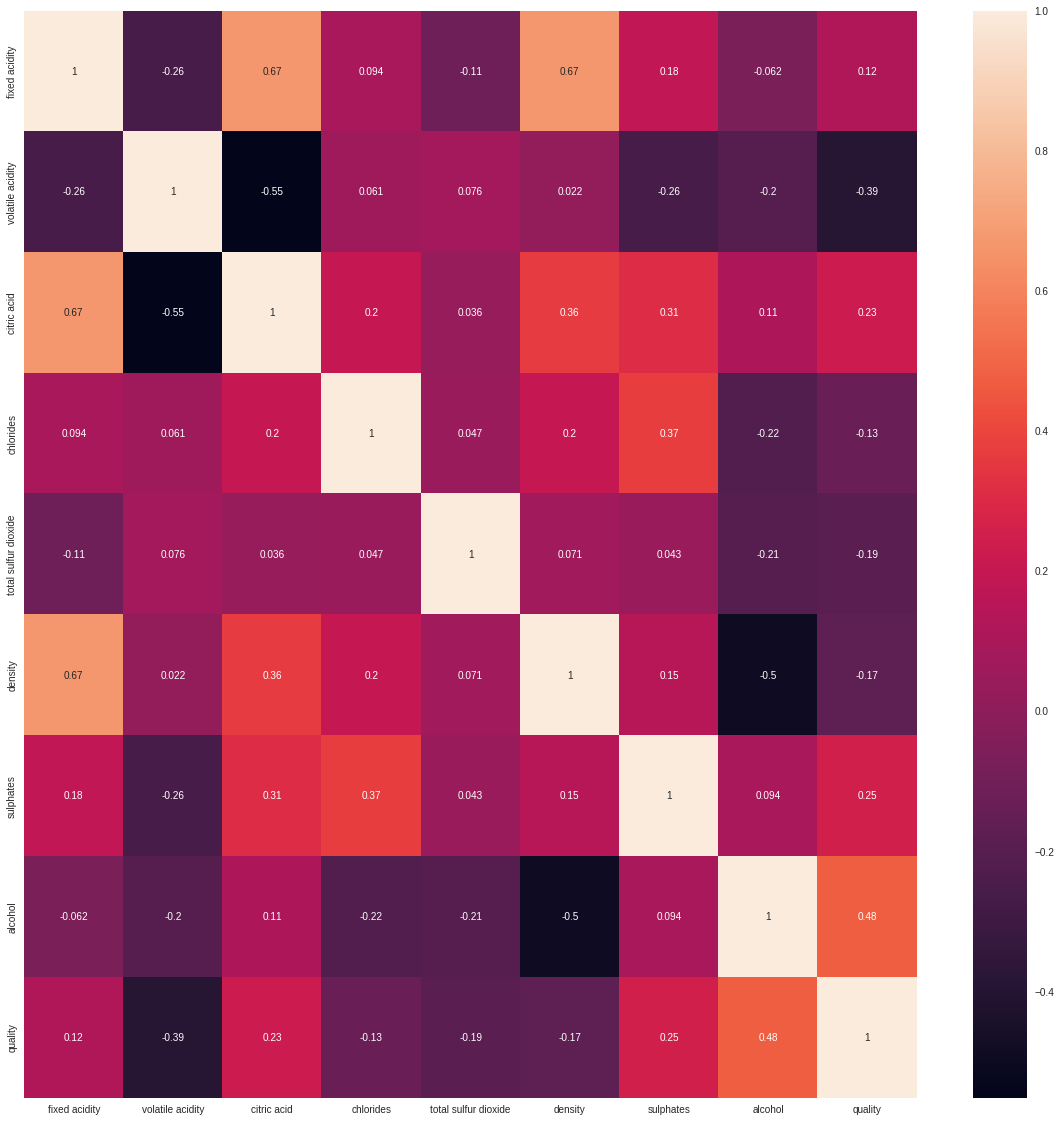

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_wr.corr(), annot = True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


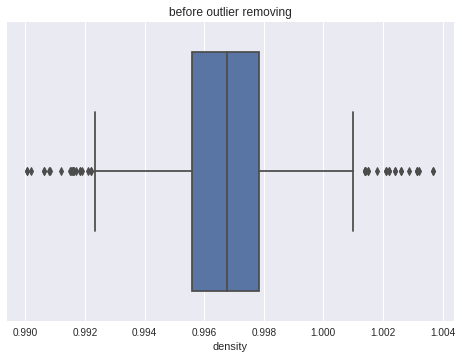

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


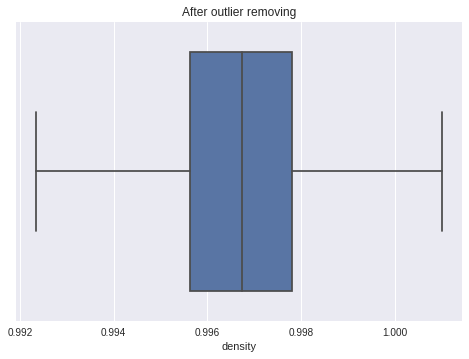

In [ ]:
sns.boxplot(df_wr['density'])
plt.title("before outlier removing")
plt.show()

def drop_outlier(df, field):
  q1 = df[field].quantile(0.25)
  q3 = df[field].quantile(0.75)
  iqr = 1.5*(q3-q1)
  df.drop(df[df[field]>(iqr+q3)].index, inplace=True)
  df.drop(df[df[field]<(q1-iqr)].index, inplace=True)

drop_outlier(df_wr, "density")
sns.boxplot(df_wr['density'])
plt.title("After outlier removing")
plt.show()

before removing outlier, except density


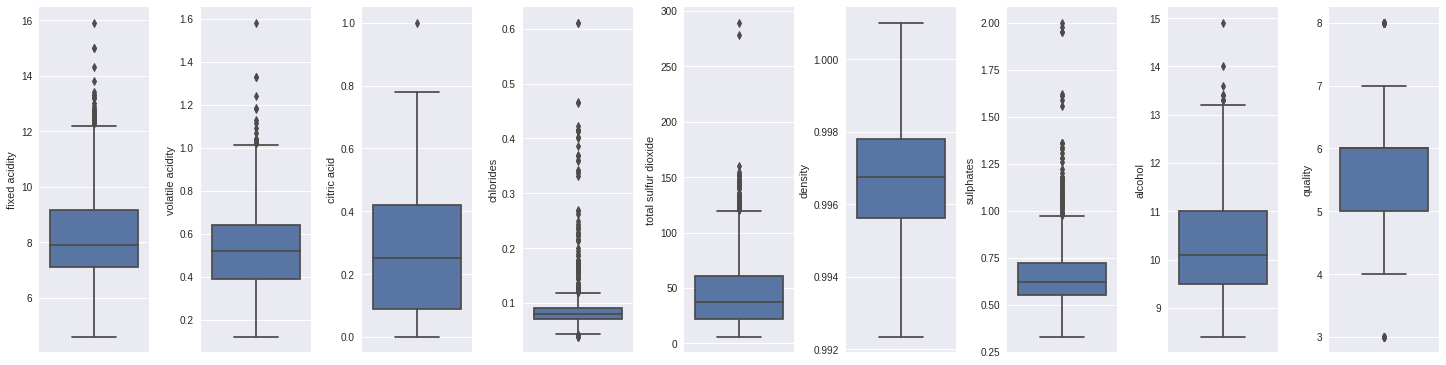

after removing outlier


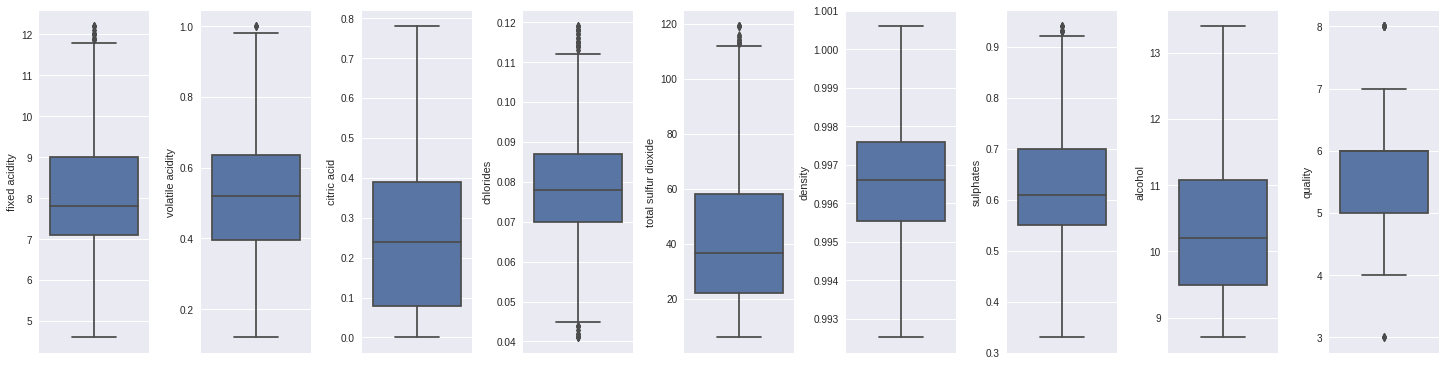

In [ ]:
print("before removing outlier, except density")
figure, axis = plt.subplots(1,9, figsize=(20,5))
df_wr2 = df_wr
index = 0
axis = axis.flatten()
for k, v in df_wr2.items():
  sns.boxplot(y=k, data=df_wr2, ax=axis[index])
  index +=1
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad = 0.5)
plt.show()

print("after removing outlier")
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
for x in cols:
  drop_outlier(df_wr, "{}".format(x))

figure, axis = plt.subplots(1,9, figsize=(20,5))
index = 0
axis = axis.flatten()
for k, v in df_wr.items():
  sns.boxplot(y=k, data=df_wr, ax=axis[index])
  index +=1
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad = 0.5)
plt.show()

In [ ]:
df_wr.describe()

fixed acidity  volatile acidity  citric acid    chlorides  \
count    1292.000000       1292.000000  1292.000000  1292.000000   
mean        8.122523          0.524133     0.248289     0.078841   
std         1.450798          0.165033     0.182656     0.014520   
min         4.600000          0.120000     0.000000     0.041000   
25%         7.100000          0.395000     0.080000     0.070000   
50%         7.800000          0.520000     0.240000     0.078000   
75%         9.000000          0.635000     0.390000     0.087000   
max        12.200000          1.000000     0.780000     0.119000   

       total sulfur dioxide      density    sulphates      alcohol  \
count           1292.000000  1292.000000  1292.000000  1292.000000   
mean              42.400155     0.996599     0.630248    10.410397   
std               26.312217     0.001570     0.113449     0.998411   
min                6.000000     0.992520     0.330000     8.700000   
25%               22.000000     0.995537     0.550000     9.500000   
50%               36.500000     0.996600     0.610000    10.200000   
75%               58.000000     0.997600     0.700000    11.075000   
max              119.000000     1.000600     0.940000    13.400000   

           quality  
count  1292.000000  
mean      5.652477  
std       0.780753  
min       3.000000  
25%       5.000000  
50%       6.000000  
75%       6.000000  
max       8.000000

#### Handling Numerical Values (Standard Scaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
df_rw_ss = df_wr

In [ ]:
def standardscal(df_wr, field):
  df_rw_ss["ss_{}".format(field)] = sc.fit_transform(df_wr[[field]])

before standard scaller


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

after standard scaller


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

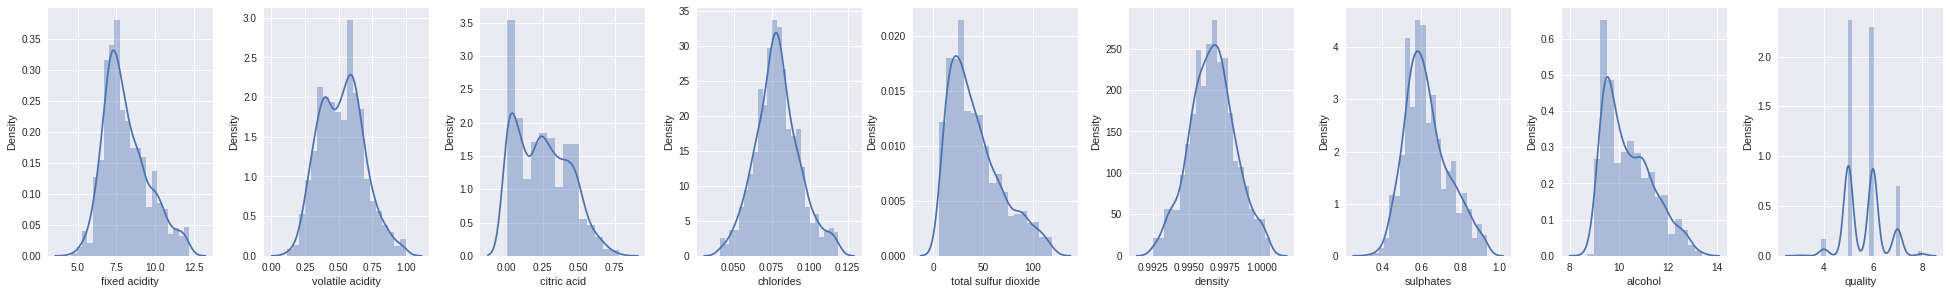

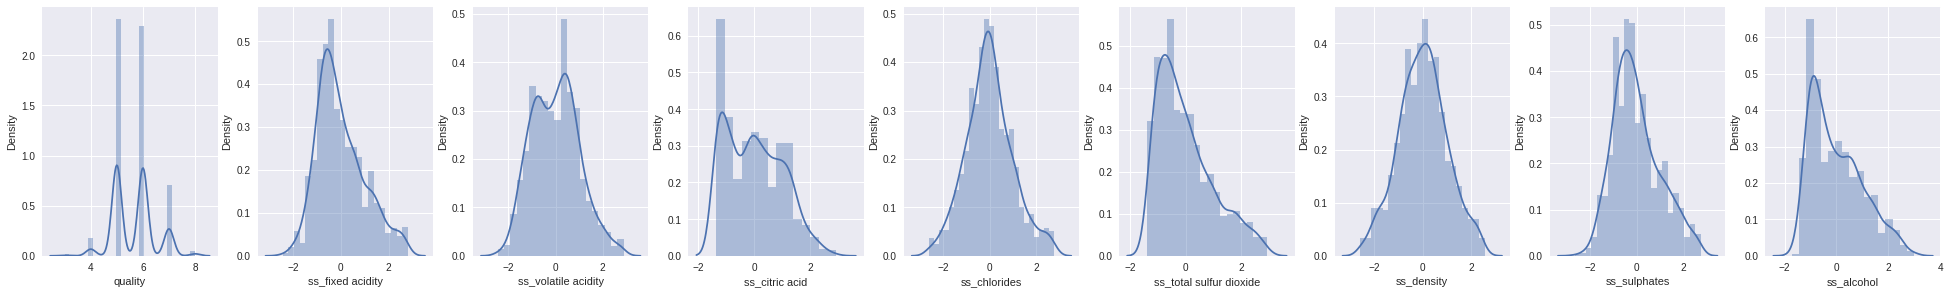

In [ ]:
print("before standard scaller")
fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(27, 4))
index = 0
axs = axs.flatten()
for k,v in df_wr.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    if index >= 9:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Looping
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
for i in cols:
  standardscal(df_wr, "{}".format(i))

# Drop on df_rwe_ss which is not standard scaller
df_rw_ss = df_rw_ss.drop(cols, axis=1)


print("after standard scaller")
fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(27, 4))
index = 0
axs = axs.flatten()
for k,v in df_rw_ss.items():
  sns.distplot(v, ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Classification Good or Bad

In [ ]:
df_rw_ss.describe()

quality  ss_fixed acidity  ss_volatile acidity  ss_citric acid  \
count  1292.000000      1.292000e+03         1.292000e+03    1.292000e+03   
mean      5.652477      5.279575e-16        -4.344650e-16    1.209902e-16   
std       0.780753      1.000387e+00         1.000387e+00    1.000387e+00   
min       3.000000     -2.428931e+00        -2.449743e+00   -1.359851e+00   
25%       5.000000     -7.050736e-01        -7.827694e-01   -9.217011e-01   
50%       6.000000     -2.223936e-01        -2.505387e-02   -4.540044e-02   
75%       6.000000      6.050579e-01         6.720444e-01    7.761314e-01   
max       8.000000      2.811595e+00         2.884574e+00    2.912114e+00   

       ss_chlorides  ss_total sulfur dioxide    ss_density  ss_sulphates  \
count  1.292000e+03             1.292000e+03  1.292000e+03  1.292000e+03   
mean  -1.099911e-16            -6.599468e-17 -2.538595e-14  9.899202e-17   
std    1.000387e+00             1.000387e+00  1.000387e+00  1.000387e+00   
min   -2.607112e+00            -1.383929e+00 -2.598655e+00 -2.647578e+00   
25%   -6.090906e-01            -7.756113e-01 -6.760329e-01 -7.076223e-01   
50%   -5.791213e-02            -2.243231e-01  9.468593e-04 -1.785436e-01   
75%    5.621636e-01             5.931042e-01  6.381043e-01  6.150745e-01   
max    2.766877e+00             2.912317e+00  2.549577e+00  2.731389e+00   

         ss_alcohol  
count  1.292000e+03  
mean   6.819450e-16  
std    1.000387e+00  
min   -1.713784e+00  
25%   -9.121998e-01  
50%   -2.108139e-01  
75%    6.659185e-01  
max    2.995522e+00

karena diketahui bahwa kualitas anggur merah mempunyai batas minimum sebesar 3 dan maksimum 8, maka akan dilakukan klasifikasi anggur berkualitas baik dan buruk.
- Kami memilih klasifikasi anggur baik dengan nilai kualitas lebih dari sama dengan 6 (8, 7, 6)
- Sedangkan dibawahnya bernilai buruk (5,4,3)

In [ ]:
df_rw_ss.isnull().sum()

quality                    0
ss_fixed acidity           0
ss_volatile acidity        0
ss_citric acid             0
ss_chlorides               0
ss_total sulfur dioxide    0
ss_density                 0
ss_sulphates               0
ss_alcohol                 0
dtype: int64

In [ ]:
df_rw_ss['quality_good'] = 0
df_rw_ss.loc[(df_rw_ss['quality'] >=7), 'quality_good'] = 1
df_rw_ss.loc[(df_rw_ss['quality'] <7), 'quality_good'] = 0

In [ ]:
  df_rw_ss.describe()

quality  ss_fixed acidity  ss_volatile acidity  ss_citric acid  \
count  1292.000000      1.292000e+03         1.292000e+03    1.292000e+03   
mean      5.652477      5.279575e-16        -4.344650e-16    1.209902e-16   
std       0.780753      1.000387e+00         1.000387e+00    1.000387e+00   
min       3.000000     -2.428931e+00        -2.449743e+00   -1.359851e+00   
25%       5.000000     -7.050736e-01        -7.827694e-01   -9.217011e-01   
50%       6.000000     -2.223936e-01        -2.505387e-02   -4.540044e-02   
75%       6.000000      6.050579e-01         6.720444e-01    7.761314e-01   
max       8.000000      2.811595e+00         2.884574e+00    2.912114e+00   

       ss_chlorides  ss_total sulfur dioxide    ss_density  ss_sulphates  \
count  1.292000e+03             1.292000e+03  1.292000e+03  1.292000e+03   
mean  -1.099911e-16            -6.599468e-17 -2.538595e-14  9.899202e-17   
std    1.000387e+00             1.000387e+00  1.000387e+00  1.000387e+00   
min   -2.607112e+00            -1.383929e+00 -2.598655e+00 -2.647578e+00   
25%   -6.090906e-01            -7.756113e-01 -6.760329e-01 -7.076223e-01   
50%   -5.791213e-02            -2.243231e-01  9.468593e-04 -1.785436e-01   
75%    5.621636e-01             5.931042e-01  6.381043e-01  6.150745e-01   
max    2.766877e+00             2.912317e+00  2.549577e+00  2.731389e+00   

         ss_alcohol  quality_good  
count  1.292000e+03   1292.000000  
mean   6.819450e-16      0.134675  
std    1.000387e+00      0.341508  
min   -1.713784e+00      0.000000  
25%   -9.121998e-01      0.000000  
50%   -2.108139e-01      0.000000  
75%    6.659185e-01      0.000000  
max    2.995522e+00      1.000000

In [ ]:
df_rw_ss = df_rw_ss.drop(['quality'],axis=1)

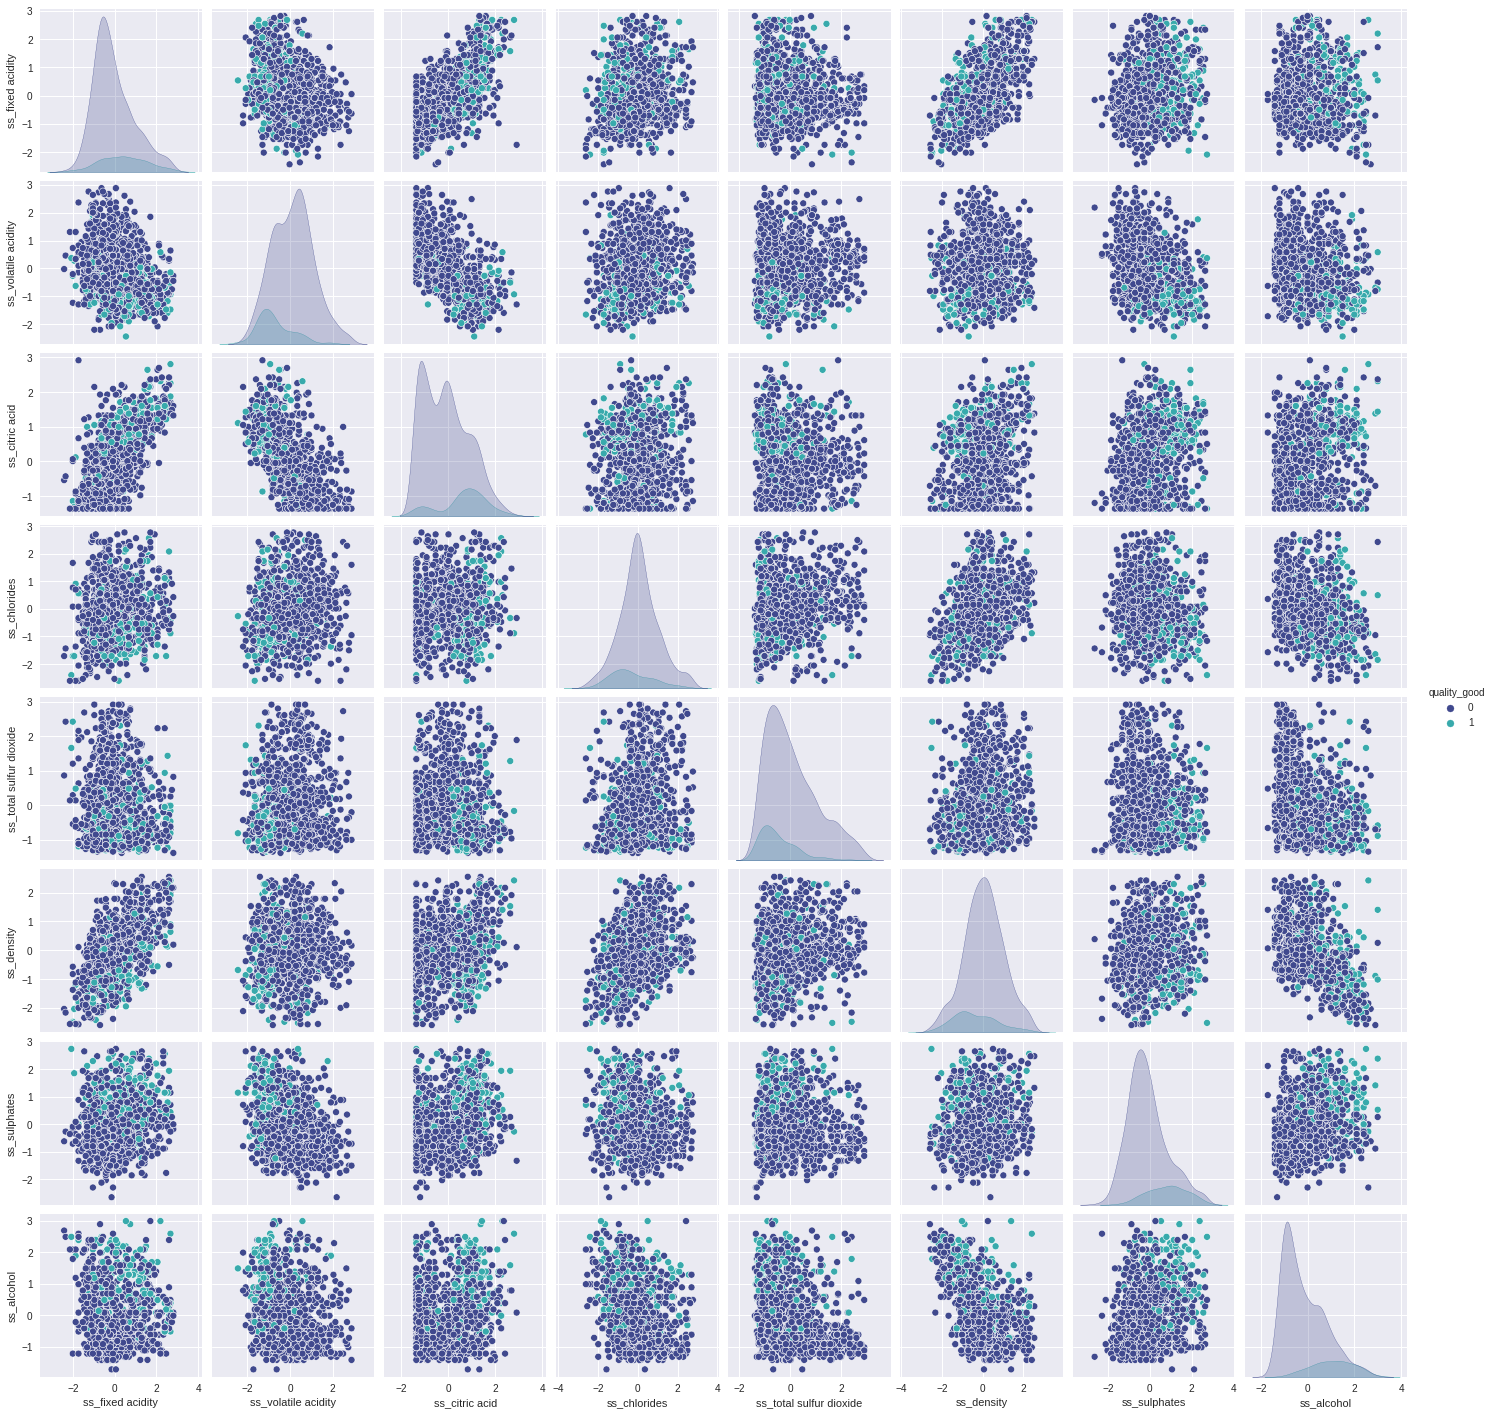

In [ ]:
sns.pairplot(df_rw_ss, hue='quality_good', palette='mako')
plt.show()

# Modelling

In [ ]:
# Splitting
X = df_rw_ss.drop(['quality_good'],axis=1)
Y = df_rw_ss['quality_good']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

<h3> Synthetic Minority Oversampling Technique (SMOTE) </h3>

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#proportion before using SMOTE
Y_train.value_counts()

0    898
1    135
Name: quality_good, dtype: int64

In [ ]:
#memisah nama kolom variabel prediktor dan target
y_cols=["quality_good"]
x_cols= [x for x in df_rw_ss.columns if x not in y_cols]

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority', random_state = 42)
train_smote_X, train_smote_Y = os.fit_resample(X_train,Y_train)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=x_cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=y_cols)

In [ ]:
#proportion after using SMOTE
train_smote_Y["quality_good"].value_counts()

0    898
1    898
Name: quality_good, dtype: int64

<h3> Model Data With Random Forest </h3>

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rfc= RandomForestClassifier()
model = rfc.fit(X_train, Y_train)
prediction = model.predict(X_test)
confusion_matrix(Y_test, prediction)

array([[214,   6],
       [ 24,  15]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)

0.8841698841698842

In [ ]:
from sklearn.metrics import classification_report
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print('RANDOM FOREST TRAINING RESULT:')
print('======================================================')
print('Accuracy:', rfc.score(X_train, Y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(Y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(Y_train, y_train_pred))

print('\n======================================================')

print('\n RANDOM FOREST TESTING RESULT:')
print('======================================================')
print('Accuracy:', rfc.score(X_test, Y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(Y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(Y_test, y_test_pred))

RANDOM FOREST TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       898
           1       1.00      1.00      1.00       135

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

Confussion Matrix ------------------------------------
[[898   0]
 [  0 135]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.8841698841698842
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       220
           1       0.71      0.38      0.50        39

    accuracy                           0.88       259
   macro avg       0.81      0.68      0.72       259
weighted avg       0.87      0.88      0.87       259

Confussion Matrix ---------------------------------

## Confussion Matrix - Random Forest

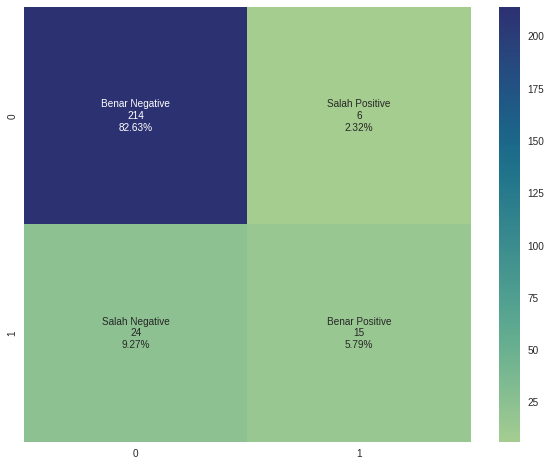

In [ ]:
y_pred = rfc.predict(X_test)
cf_matrix = confusion_matrix(Y_test, y_pred)

group_names = ["Benar Negative", "Salah Positive", "Salah Negative", "Benar Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')

 # Support Vector Machine (SVM) Classification

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, Y_train)

SVC(random_state=42)

In [ ]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(Y_test, Y_pred))
cm

Accuracy :  0.8687258687258688


array([[216,   4],
       [ 30,   9]])

In [ ]:
df = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred})
df.head(25)

Real Values  Predicted Values
476             0                 0
668             0                 0
812             0                 0
609             0                 0
358             1                 0
1263            0                 0
141             0                 0
733             0                 0
707             0                 0
547             0                 0
1161            0                 0
420             1                 0
758             0                 0
1410            0                 0
1503            0                 0
824             0                 0
1266            0                 0
1321            0                 0
74              0                 0
626             0                 0
1307            0                 0
1541            1                 0
312             0                 0
1420            0                 0
260             0                 0

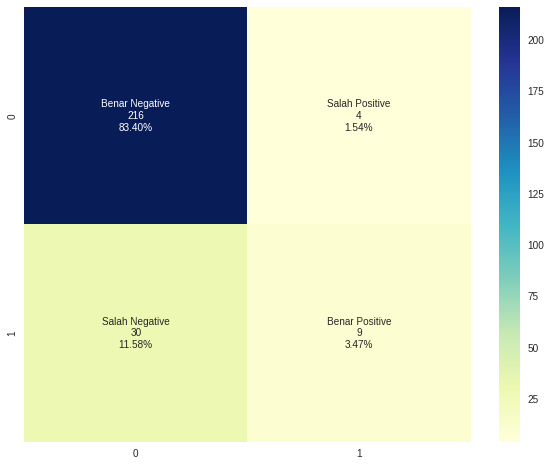

In [ ]:
group_names = ["Benar Negative", "Salah Positive", "Salah Negative", "Benar Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=labels, fmt='', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       220
           1       0.69      0.23      0.35        39

    accuracy                           0.87       259
   macro avg       0.79      0.61      0.64       259
weighted avg       0.85      0.87      0.84       259



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
cl = LogisticRegression(random_state=42)
cl.fit(X_train , Y_train)
p_y = cl.predict(X_test)

In [ ]:
accuracy_log = confusion_matrix(Y_test , p_y)
print(accuracy_log)

[[215   5]
 [ 23  16]]


In [ ]:
xaclog = accuracy_score(Y_test,p_y)
print(xaclog*100)

89.1891891891892


Confussion Matrix From Logistic Model


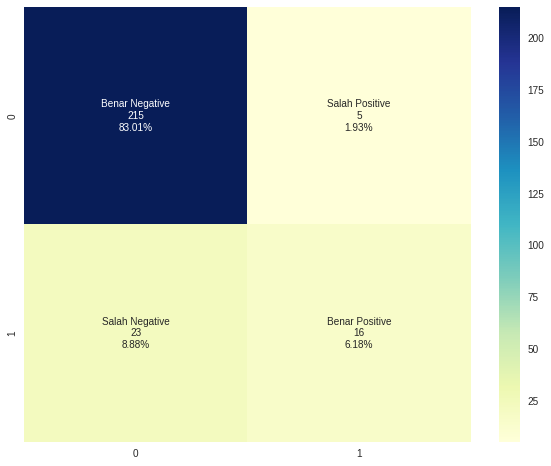

In [ ]:
print("Confussion Matrix From Logistic Model")
group_names = ["Benar Negative", "Salah Positive", "Salah Negative", "Benar Positive"]
group_counts = ["{0:0.0f}".format(value) for value in accuracy_log.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in accuracy_log.flatten()/np.sum(accuracy_log)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_log, annot=labels, fmt='', cmap='YlGnBu')

In [ ]:
print(classification_report(Y_test, p_y))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       220
           1       0.76      0.41      0.53        39

    accuracy                           0.89       259
   macro avg       0.83      0.69      0.74       259
weighted avg       0.88      0.89      0.88       259



Kesimpulan :
- Dengan asumsi klasifikasi baik bernilai (quality>=6), model terbaik pada random forest dengan nilai akurasi 81%
- Sedangkan dengan klasifikasi baik bernilai (quality>=7), semua model menghasilkan kesemuanya memiliki nilai akurasi yang lebih tinggi.
- Dengan klasifikasi tersebut, logistik regression menjadi model terbaik dengan akurasi bernilai 89%.